# Exclusion-from-mzTab notebook for IODA

**Purpose**: The IODA exclusion-from-mzTab notebook allows to generate exclusion lists for Iterative Optimise Data Acquisition (IODA) of fragmentation spectra in LC-MS.

**Usage**: This notebook requires the user to provide an mzTab for one "blank" sample.  All the ions detected will be added to exclusion list. The IODA-exclusion workflows formats the ions for exclusion with XCalibur or [MaxQuant.Live]. If you need to generate an mzTab, we recommend using the dedicated [IODA exclusion-from-mzML notebook](IODA_exclusion_from_mzML.ipynb) using OpenMS. 

**Documentation**: Please refer to the [documentation page](link) for more informations on the TOPPAS/OpenMS for IODA exclusion-from-mzTab worklow.

**Instructions**: Follow the instructions below and run the notebook cells accordingly.

### Step 0 - Generate an mzTab file

The mzTab file must contain must contain the results for feature detection  of one "blank" sample. Please refer to the [documentation page](link) for more information.

### Step 1 - Upload the mzTab file

##### <span style="color:brown">Method 1 - Upload your mzTab file </span>

Upload your mzML files on the Binder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon). 

##### <span style="color:brown">Method 2 - Web-sharing links</span>
We support retrieving the files from the following cloud sharing services:
> **Google Drive** : copy the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').

> **MassIVE/GNPS repository** : copy the link for the file.


### Step 3 - Specify the link or path to the mzTab file

**Specificy the filename or download link for the mzTab file in the cell below.** 

It must contain result for one single LC-MS file processing. The filename must be into parenthesis, such as: \
*input_mzTab = "myfile.mzTab"* or *input_mzTab = "input_folder/myfile.mzTab"* \
The following test job could be used: \
input_mzTab = "tests/Euphorbia/exclusion/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzTab"

<!--These are various test jobs 
input_mzTab = 'https://drive.google.com/file/d/1LYk-PKsBWl4Pv7c1TlhQwaqwkF2T6sux/view?usp=sharing'
-->

In [5]:
input_mzTab = 'myfile.mzTab'

### Step 4 - Specify the parameters of the IODA-exclusion workflow
Specify the parameter values in the cell below:

*min_intensity*: the minimum intensity for the ion/feature to be retained in the exclusion list (absolute feature intensity).

*rt_exclusion_margin*: define the side margin for the retention time range exclusion. Note that this value is added to each side of the actual feature/ion retention time range. The units are seconds.

**Specify the variables for IODA-exclusion workflow in the cell below**

In [6]:
min_intensity = 100
rt_exclusion_margin = 5

### Step 5 - Run the IODA-exclusion workflow

Simply run the cell below to start the IODA-exclusion workflow.

In [7]:
from IODA_exclusion_workflow import *
make_exclusion_from_mzTab(input_mzTab, min_intensity, rt_exclusion_margin)

[I 200718 18:44:54 IODA_exclusion_workflow:257] 2020-07-18 18:44:54.793968
[I 200718 18:44:54 IODA_exclusion_workflow:259] Starting the IODA exclusion-from-mzTab workflow
[I 200718 18:44:54 IODA_exclusion_workflow:261] ======
[I 200718 18:44:54 IODA_exclusion_workflow:262] Getting the mzTab
[I 200718 18:44:54 IODA_exclusion_workflow:263] This is the input: tests/Euphorbia/exclusion/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzTab
[I 200718 18:44:54 IODA_exclusion_workflow:276] This is the input file path: tests/Euphorbia/exclusion/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzTab
[I 200718 18:44:54 IODA_exclusion_workflow:277] This is the output file path: results/Euphorbia_rogers_latex_Blank_MS1_2uL.csv
[I 200718 18:44:54 IODA_exclusion_workflow:278] ======
[I 200718 18:44:54 IODA_exclusion_workflow:279] Converting mzTab to table format
[I 200718 18:44:54 IODA_exclusion_workflow:41] Filename(s) in the mzTab['Euphorbia_rogers_latex_Blank_MS1_2uL']
[I 200718 18:44:54 IODA_exclu

### Step 6 - Visualize the results

Run the cell below to view the scatter plots. These plots can help you adjusting parameters to your sample and experimental conditions.

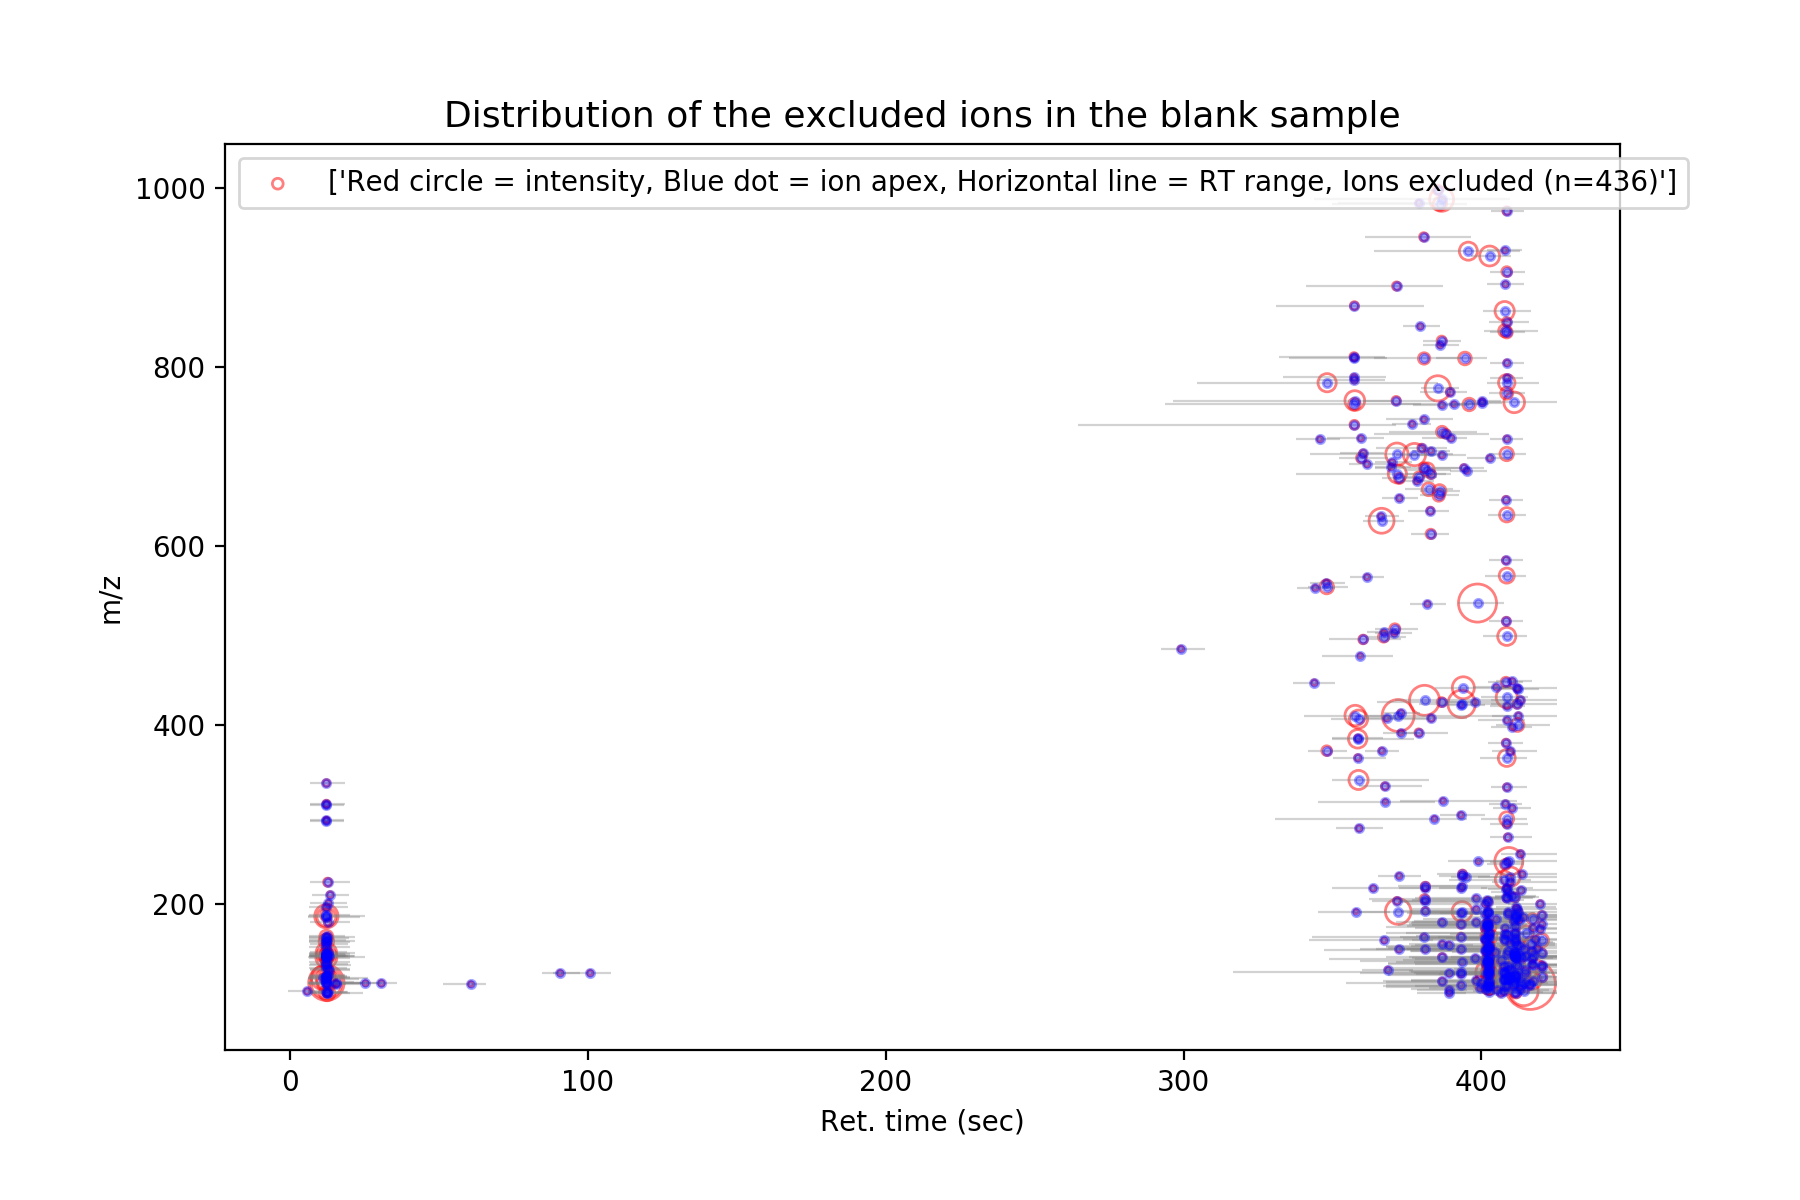

In [9]:
from IPython.display import Image
Image("results/plot_exclusion_RT_range_plot.png")

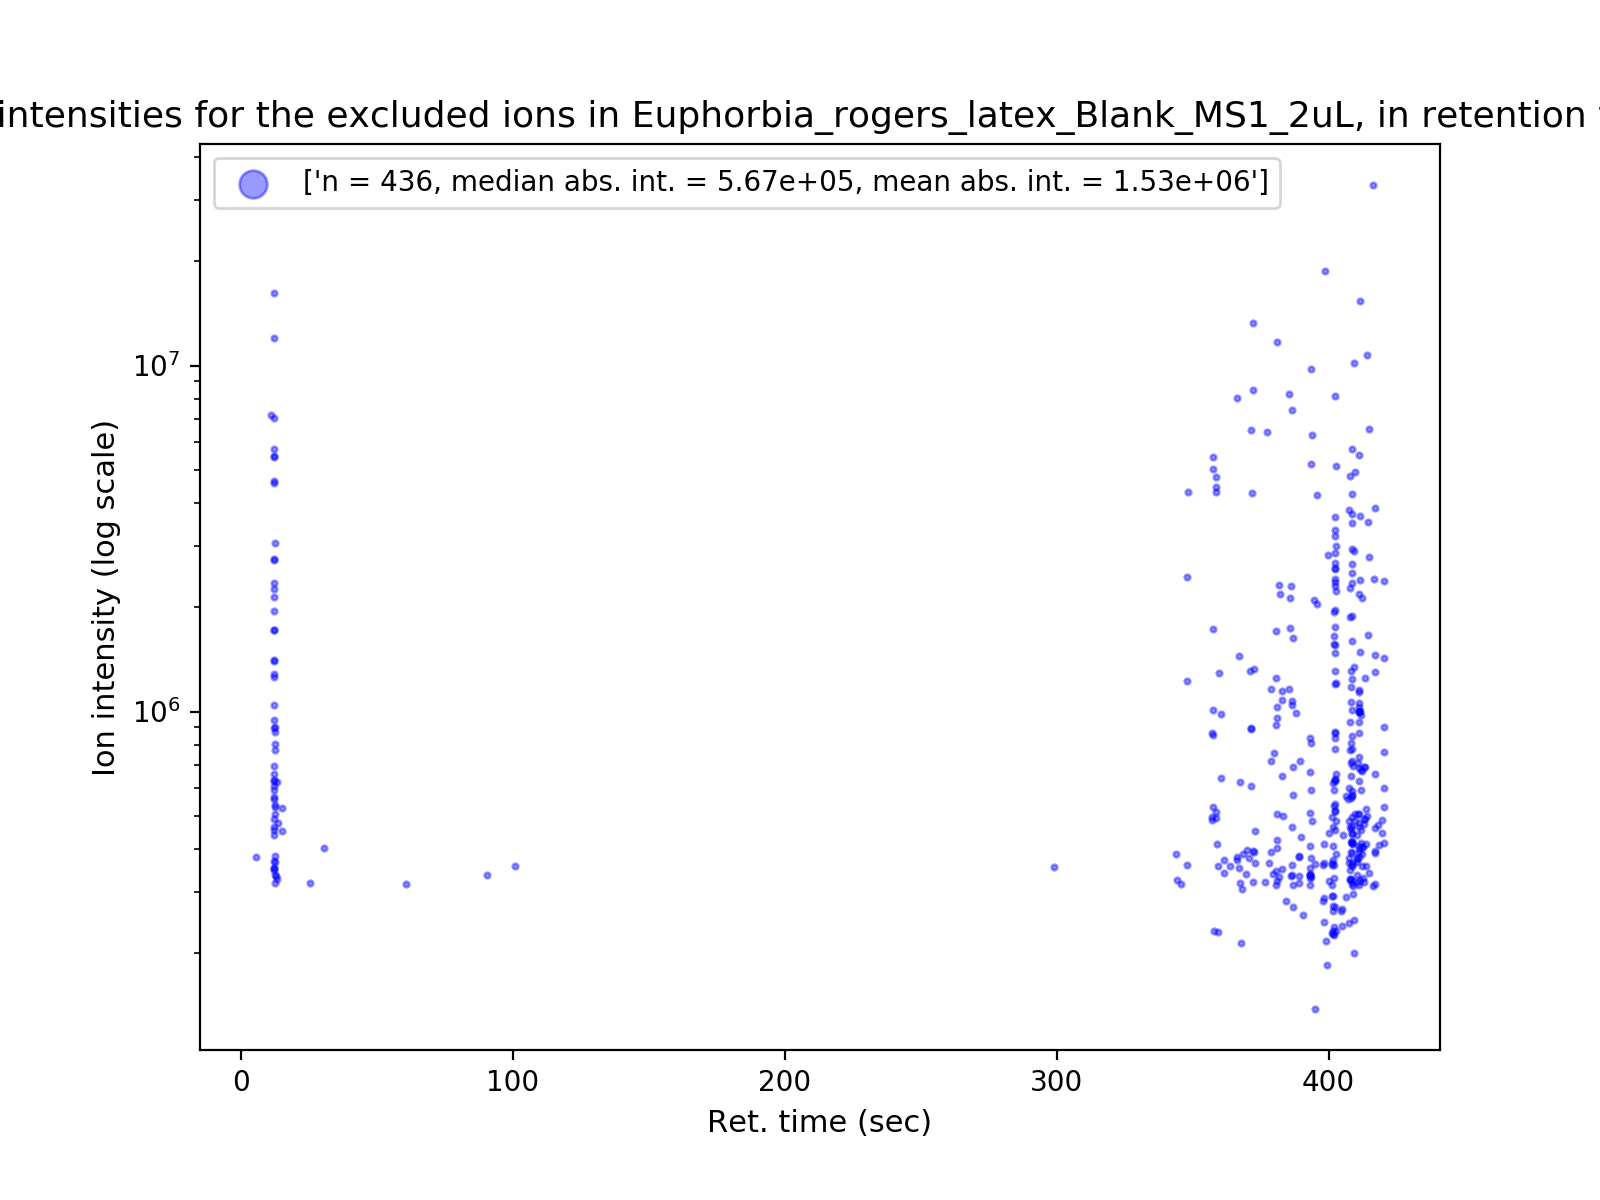

In [10]:
Image("results/plot_exclusion_scatter_RT.png")

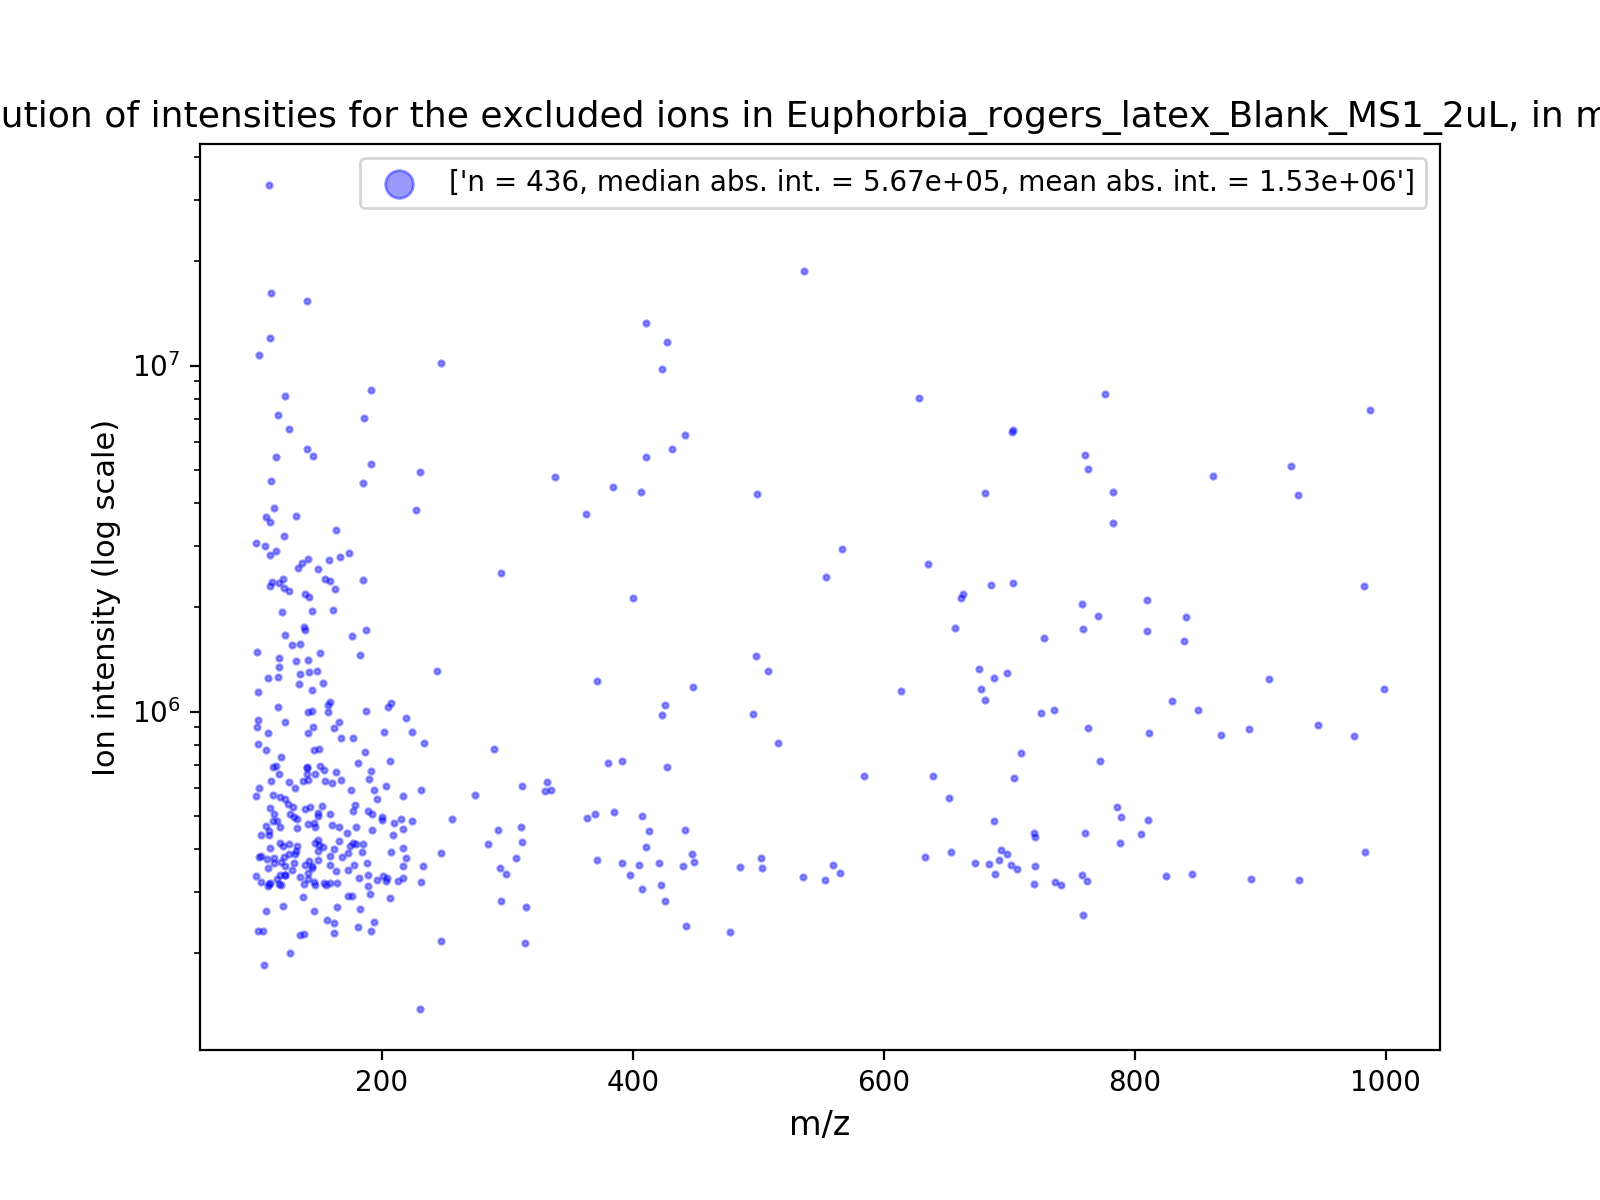

In [11]:
Image("results/plot_exclusion_scatter_MZ.png")

### Step 7 - Examine the results

**Visualize** : Run the cell below to show the scatter plot for the IODA-exclusion workflow results. The scatter plots shows the distribution of the ions excluded in the blank sample based on the parameters defined. Horizontal lines are indicating the retention time range for the ions/features excluded. 

- Examine the IODA-exclusion worflow log and the plots in order to verify that the *min_intensity* parameter is adapted to exclusion level you want to apply, and your sample(s) complexity. 
- You could also rerun the OpenMS processing with different parameter values *narrow_feature_noise* and *large_feature_noise*. The OpenMS processing parameters can be adjusted locally for optimal feature detection. [See the documentation](documentation.ipynb).

### Step 8 - Download the results

Download the result file at
[download-results/IODA_exclusion_results.zip](download-results/IODA_exclusion_results.zip?download=1)

### Step 9 - Prepare your IODA experiment
Prepare the IODA experiment. For instructions on how to load and configure an target/inclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).